In \[7\]:

    # import the libraries

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    import warnings
    warnings.filterwarnings("ignore")

    #pd.set_option["display.max_columns", 50]

In \[9\]:

    sales = pd.read_csv("~/Downloads/k_circle_sales (1).csv")

In \[10\]:

    # preview the data - 5 rows of data
    sales.head(2)

Out\[10\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type   | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit |
|-----|-----------------|-------------|------------------|-----------------|-------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|
| 0   | FDA15           | 9.30        | Low Fat          | 0.016047        | Dairy       | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   |
| 1   | DRC01           | 5.92        | Regular          | 0.019278        | Soft Drinks | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   |

In \[14\]:

    # check the info of the data
    sales.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 8523 entries, 0 to 8522
    Data columns (total 13 columns):
    Item_Identifier              8523 non-null object
    Item_Weight                  7774 non-null float64
    Item_Fat_Content             8523 non-null object
    Item_Visibility              8523 non-null float64
    Item_Type                    8523 non-null object
    Item_MRP                     8523 non-null float64
    Outlet_Identifier            8523 non-null object
    Outlet_Establishment_Year    8523 non-null int64
    Outlet_Size                  6113 non-null object
    Outlet_Location_Type         6473 non-null object
    Outlet_Type                  8523 non-null object
    Item_Outlet_Sales            8523 non-null float64
    Profit                       8523 non-null float64
    dtypes: float64(5), int64(1), object(7)
    memory usage: 865.7+ KB

#### Exploratory Data Analysis Steps<a href="#Exploratory-Data-Analysis-Steps" class="anchor-link">¶</a>

Note: Data generally shows up either numerical or
categorical(non-numeric) or a combination of both.

1.  Univariate Analysis (Single Column Analysis) ***Numerical
    variables - Distplot or Histogram or Boxplot*** ***Categorical
    variable (non numerical) - Countplot***

2.  Bivariate Analysis ( Predictor Vs target)

3.  Num vs Num(Target) - Scatterplot

4.  Cat vs Num(Target) - Boxplot, Violinplot...

5.  Cat vs Cat (Target) - Crosstable, Frequencyplot (Countplot)

6.  Missing values

7.  Outlier Analysis & Identification

8.  Feature Engineering

9.  Scaling and Transformation

In \[21\]:

    # Univariate
    # List of all the numerical variables

    sales.select_dtypes(include = np.number).columns

Out\[21\]:

    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
           'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
          dtype='object')

In \[39\]:

    plt.rcParams['figure.figsize'] = [15, 6]
    cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
           'Item_Outlet_Sales', 'Profit']
    rows= 2
    columns = 3
    ith = 1 # this will print the plots

    for i in cols:
        plt.subplot(rows, columns, ith)
        sns.distplot(sales.loc[:, i].dropna())
        ith = ith+1 # this will print the plots
        plt.title(i)

    plt.tight_layout()
    plt.show()

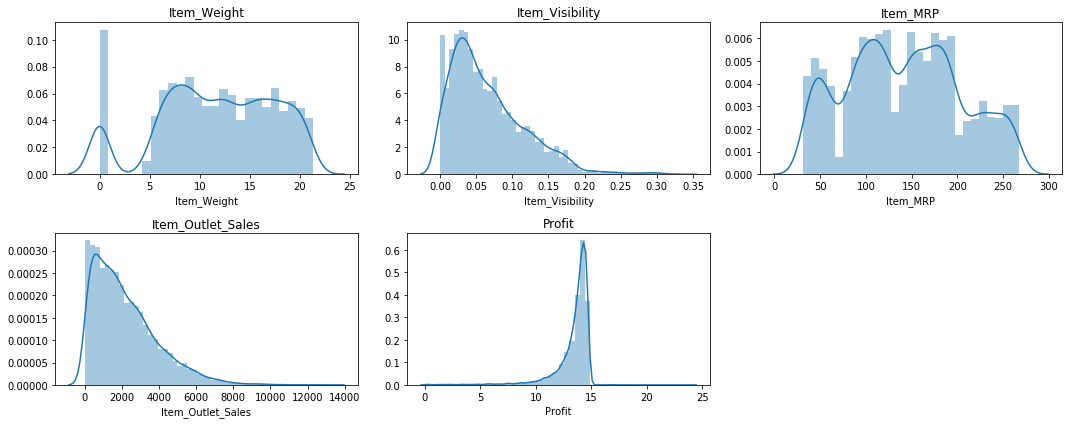

In \[36\]:

    #sns.distplot(sales.Profit)

In \[41\]:

    # MRP Vs Sales:: MRP has 4 Distributions

    sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales",
                   data = sales)

Out\[41\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1ed49f11a90>

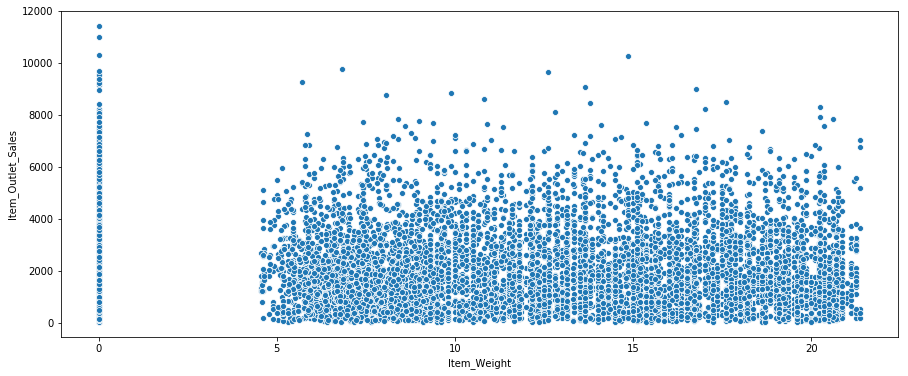

In \[44\]:

    sales.head(2)

Out\[44\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type   | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit |
|-----|-----------------|-------------|------------------|-----------------|-------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|
| 0   | FDA15           | 9.30        | Low Fat          | 0.016047        | Dairy       | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   |
| 1   | DRC01           | 5.92        | Regular          | 0.019278        | Soft Drinks | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   |

In \[46\]:

    # Cat Variables

    sales.select_dtypes(include = "object").columns

Out\[46\]:

    Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
           'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
          dtype='object')

In \[47\]:

    cols = ['Item_Fat_Content', 'Item_Type', 
            'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 
            'Outlet_Type']

In \[52\]:

    # Countplot
    plt.rcParams['figure.figsize'] = [15, 10]
    a = 2
    b = 3
    c = 1
    for i in cols:
        plt.subplot(a, b, c)
        sns.countplot(sales.loc[:, i])
        c = c+1
        plt.title(i)
        plt.xticks(rotation = 90) #used to fix the label text
        
    plt.tight_layout()
    plt.show()

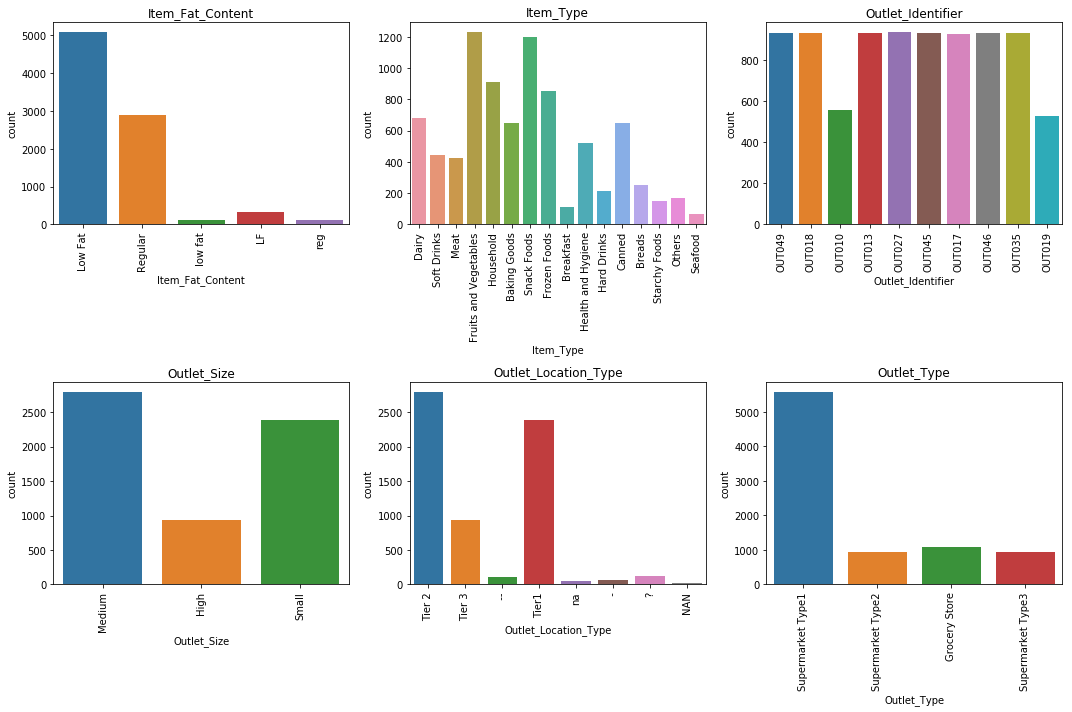

### Univariate Analysis Pattern Inference<a href="#Univariate-Analysis-Pattern-Inference"
class="anchor-link">¶</a>

-   Sales and MRP are skewed in Nature with MRP is a MultiModal Data
-   Item Weight has lot of 0s in the data
-   Most Popular Outlet in the data is "OUT027"
-   Most of the Outlets are medium size located in Tier 2 Cities with
    most of the outlet type is S1
-   The Products that the company sells are either Low Fat or Regular
-   Top 5 Selling Items are Frozen Food, Dairy, Fruits & Veggies
    followed by Household and Snacks.

In \[58\]:

    # Medium Size & Tier 2

    sales.loc[sales.Outlet_Size=="Medium" , 
              "Outlet_Location_Type"].unique() # Row Indexer and Column Indexer

Out\[58\]:

    array(['Tier 2'], dtype=object)

### Descriptive Statistics<a href="#Descriptive-Statistics" class="anchor-link">¶</a>

-   mean, median, mode
-   variance, standard deviation
-   skewness, kurtosis
-   covariance and correlation
-   Coefficient of Variation

In \[64\]:

    # Item Outlet_Sales
    print("Average Sales is {}".format(sales.Item_Outlet_Sales.mean()))
    print("Median Sales is {}".format(sales.Item_Outlet_Sales.median()))
    print("Sales Mode is {}".format(sales.Item_Outlet_Sales.mode()[0]))

    Average Sales is 2181.2889135750365
    Median Sales is 1794.3310000000001
    Sales Mode is 958.752

In \[69\]:

    # Variance and Standard Deviation

    # Variance
    print("Variance", sales.Item_Outlet_Sales.var())
    print("S.D.", sales.Item_Outlet_Sales.std())

    Variance 2912140.938499716
    S.D. 1706.499615733832

In \[71\]:

    sales.std()

Out\[71\]:

    Item_Weight                     5.776851
    Item_Visibility                 0.051598
    Item_MRP                       62.258099
    Outlet_Establishment_Year       8.371760
    Item_Outlet_Sales            1706.499616
    Profit                          1.701840
    dtype: float64

#### Coefficient of Variation<a href="#Coefficient-of-Variation" class="anchor-link">¶</a>

-   Defined as Avg/SD
-   lower the CV, better the variable or more consistent the variable
-   unitless quantity

In \[73\]:

    def cv(x):
        avg = x.mean()
        sd = x.std()
        cv = avg/sd
        return(cv)

In \[75\]:

    sales.select_dtypes(include = np.number).apply(cv)

Out\[75\]:

    Item_Weight                    2.021298
    Item_Visibility                1.281683
    Item_MRP                       2.264747
    Outlet_Establishment_Year    238.639398
    Item_Outlet_Sales              1.278224
    Profit                         7.882360
    dtype: float64

In \[79\]:

    #import scipy.stats as stats # Statistical Library
    #variation(sales)

In \[80\]:

    # Find the Skewness of the Data
    sales.skew()

Out\[80\]:

    Item_Weight                 -0.352215
    Item_Visibility              1.167091
    Item_MRP                     0.127390
    Outlet_Establishment_Year   -0.396641
    Item_Outlet_Sales            1.177531
    Profit                      -3.379808
    dtype: float64